## Rectangular Jigsaw Placement

Go to last cell to run the code

In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math

In [ ]:
#Dimensions of box
K, Q = 3, 13

#Dimensions of rectangles [(width,height),...]
rectangles = [(2, 7), (1, 3), (1, 7), (3, 3), (2,3)]

In [ ]:
#Solver

#Initial solution places the rectangles randomly within the box
def generate_initial_solution(rectangles, K, Q):
    solution = []
    for (width, height) in rectangles:
        x = random.randint(0, K - width)
        y = random.randint(0, Q - height)
        solution.append((x, y))
    #print(f"initial solution: {solution}")
    return solution

#Neighbor generation (by moving a random rectangle)
def generate_neighbor(solution, rectangles, K, Q):
    neighbor = solution.copy()
    #Select a random rectangle
    random_rect = random.randint(0, len(rectangles) - 1)
    width, height = rectangles[random_rect]

    #Randomly move the rectangle
    new_x = random.randint(0, K - width)
    new_y = random.randint(0, Q - height)

    neighbor[random_rect] = (new_x, new_y)
    return neighbor

'''Neighbor value calculation functions'''

#Overlap calculation
def calculate_overlap(rect1, rect2):
    #Extract size and placement
    w1, h1, x1, y1 = rect1
    w2, h2, x2, y2 = rect2

    #Calculate overlap
    overlap_x = max(0, min(x1+w1, x2+w2) - max(x1, x2))
    overlap_y = max(0, min(y1+h1, y2+h2) - max(y1, y2))

    return overlap_x * overlap_y

#Box boundary calculation
def check_boundary_violation(rect, K, Q):
    violation = 0
    x, y, w, h = rect
    #Right edge
    if x + w > K:
        violation += (x + w - K) * h
    #Bottom edg
    if y + h > Q:
        violation += (y + h - Q) * w
    #Left edge
    if x < 0:
        violation += abs(x) * h
    #Top edge
    if y < 0:
        violation += abs(y) * w

    return violation

#Value calculation
def calculate_value(solution, rectangles, K, Q):
    total_overlap = 0
    total_violation = 0

    #Check overlaps
    for i in range(len(rectangles)):
        for j in range(i+1, len(rectangles)):
            overlap = calculate_overlap(rectangles[i] + solution[i], rectangles[j] + solution[j])
            total_overlap += overlap

    #Check boundary violations
    for i in range(len(rectangles)):
        violation = check_boundary_violation(rectangles[i] + solution[i], K, Q)
        total_violation += violation

    #Combine for an error value
    return total_overlap + total_violation

'''SA functions'''

#Acceptance probability
def acceptance_probability(old_cost, new_cost, temp):
    if new_cost < old_cost:
        return 1.0
    return math.exp((old_cost - new_cost) / temp)

#Simulated anealing function
def simulated_annealing(rectangles, temp, cooling_rate):
    current_solution = generate_initial_solution(rectangles, K, Q)
    current_value = calculate_value(current_solution, rectangles, K, Q)
    best_solution = current_solution
    best_value = current_value
    max_temp = temp
    loop_count = 0

    #Keep reheating the oven if solution hasnt been found (or until max loop amount has been hit)
    while best_value > 0 and loop_count < 10:
        while temp > 1:
              neighbor = generate_neighbor(current_solution, rectangles, K, Q)
              neighbor_value = calculate_value(neighbor, rectangles, K, Q)

              if acceptance_probability(current_value, neighbor_value, temp) > random.random():
                  current_solution = neighbor
                  current_value = neighbor_value

              if current_value < best_value:
                  best_solution = current_solution
                  best_value = current_value

              temp *= cooling_rate
        #if it hasnt found a optimal solution yet, retry
        if best_value > 0:
            print(f"No valid solution has been found, looping SA function (best value: {best_value})")
            temp = max_temp
            loop_count += 1

    if loop_count >= 10:
        print(f"Loop limit reached")
    print(f"value of best solution: {best_value}")
    return best_solution

In [ ]:
#Visualisation

#Generate random color
def random_color():
    return [random.random() for _ in range(3)]

#Visualize with matplotlib
def visualize_solution(rectangles, solution, K, Q):
    fig, ax = plt.subplots()
    ax.set_xlim(0, K)
    ax.set_ylim(0, Q)

    for (width, height), (x, y) in zip(rectangles, solution):
        color = random_color()
        ax.add_patch(patches.Rectangle((x, y), width, height, fill=True, facecolor=color, edgecolor='black'))

    plt.show()

No working solution has been found, looping SA function (best value: 1)
value of best solution: 0


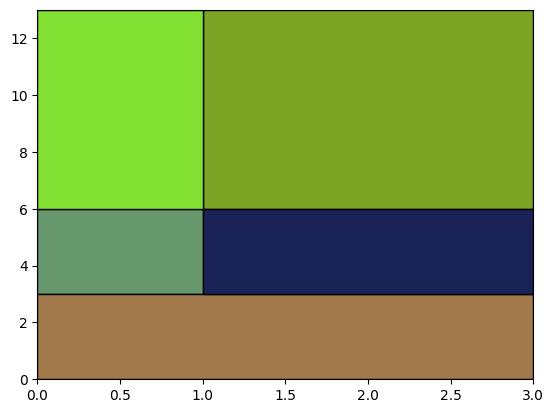

In [ ]:
#Run solver

#Options, uncomment if you want to change them
#K, Q = 3, 13
#rectangles = [(2, 7), (1, 3), (1, 7), (3, 3), (2,3)]

#Temperature and cooling rate for SA
initial_temp = 100   #default 100
cooling_rate = 0.999   #default 0.999

#Run solver
solution = simulated_annealing(rectangles, initial_temp, cooling_rate)

#Visualisation
visualize_solution(rectangles, solution, K, Q)